# Simple Linear Assignment 1 
Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary 
transformations and select the best model using R or Python.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.preprocessing import PolynomialFeatures


In [2]:
# Load and explore data
df = pd.read_csv('Salary_Data.csv')
df


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
# EDA 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
list(df)

['YearsExperience', 'Salary']

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.shape

(30, 2)

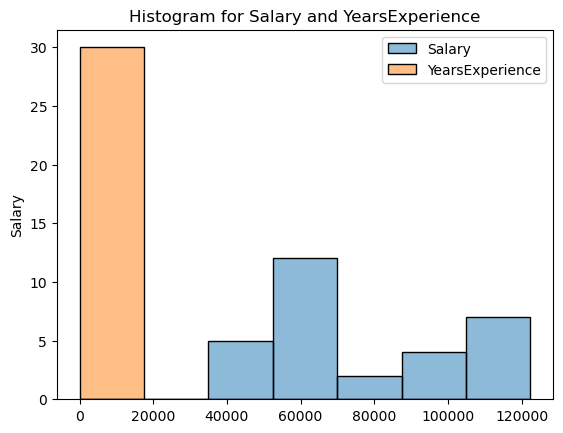

In [7]:
# ---- Histogram---#
sns.histplot(data=df[['Salary', 'YearsExperience']])
plt.title('Histogram for Salary and YearsExperience')
plt.ylabel('Salary')
plt.show()


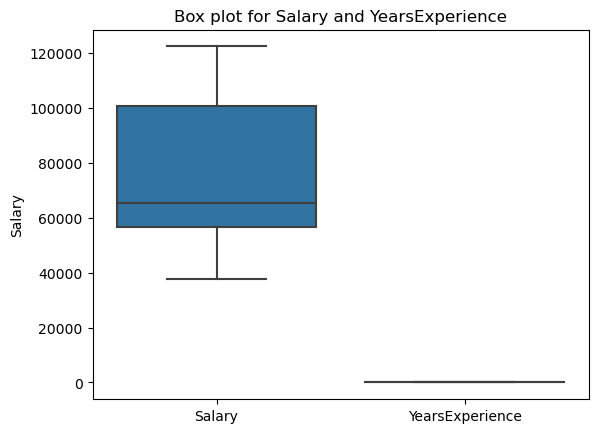

In [8]:
#--- Box plot---#
sns.boxplot(data=df[['Salary', 'YearsExperience']])
plt.title('Box plot for Salary and YearsExperience')
plt.ylabel('Salary')
plt.show()


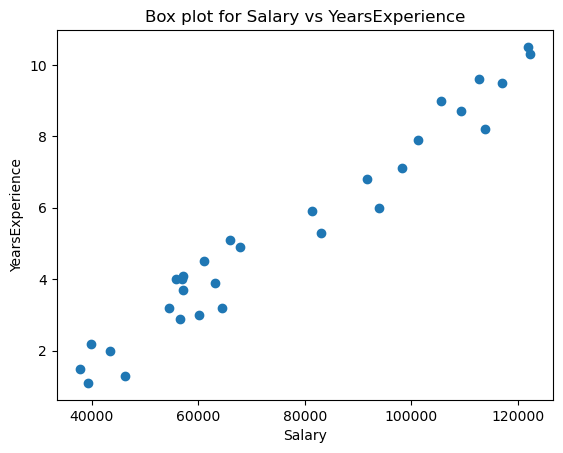

In [9]:
##----Scatter----##
plt.scatter(df['Salary'], df['YearsExperience'])
plt.title('Box plot for Salary vs YearsExperience')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()


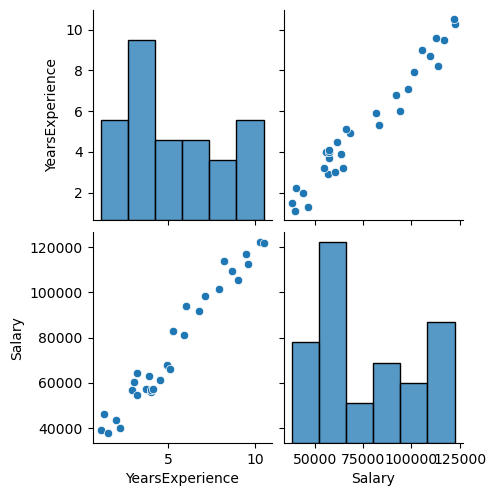

In [10]:
##----Pairplot----###
sns.pairplot(df)
plt.show()


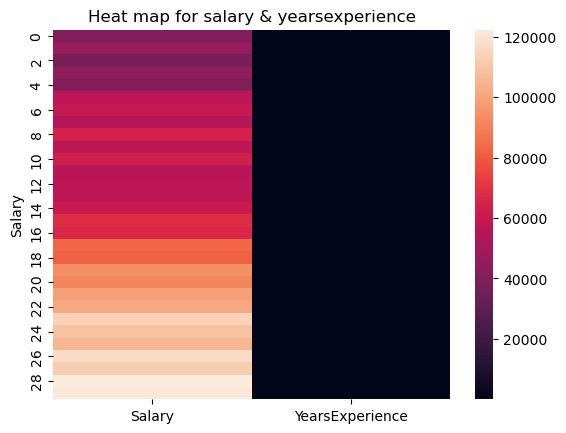

In [11]:
##---Heatmap---###
sns.heatmap(data=df[['Salary', 'YearsExperience']])
plt.title('Heat map for salary & yearsexperience')
plt.ylabel('Salary')
plt.show()


C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_27248\3040617295.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])
C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_27248\3040617295.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

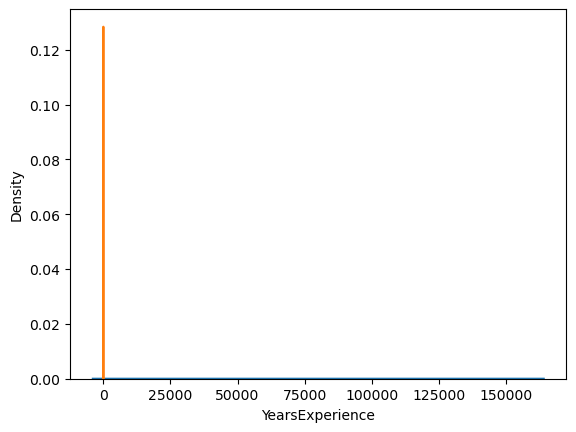

In [12]:
#-- Distrbution plot---#
sns.distplot(df['Salary'])
sns.distplot(df['YearsExperience'])


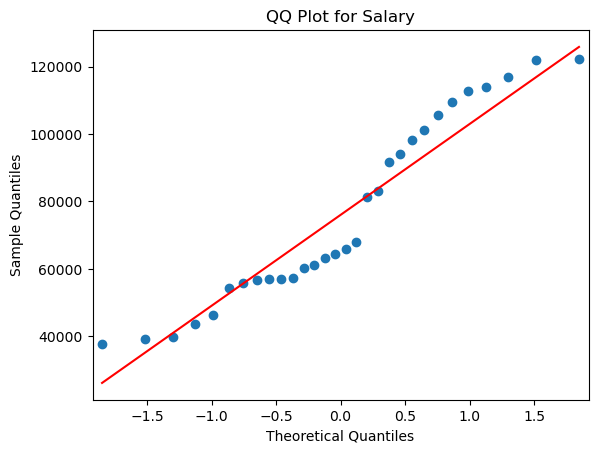

In [13]:
##-- Q-Q-PLOT--##
sm.qqplot(df['Salary'], line='s')
plt.title('QQ Plot for Salary')
plt.show()


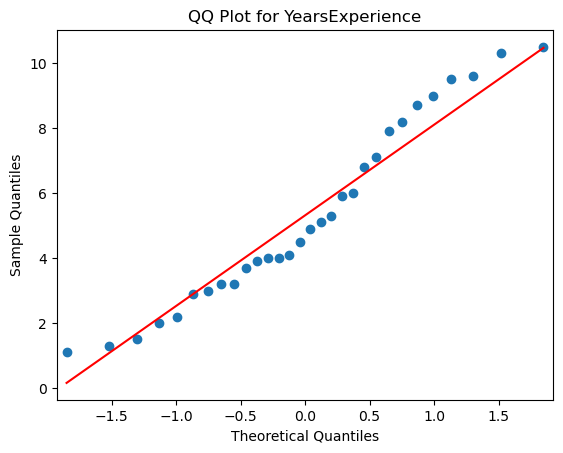

In [14]:
## --Q-Q plot for YearsExperience-- plot--##
sm.qqplot(df['YearsExperience'], line='s')
plt.title('QQ Plot for YearsExperience')
plt.show()


In [13]:
# Prepare data for training
x = df[['YearsExperience']]
y = df['Salary']


In [14]:
# data partion
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
# Train the model
Lr= LinearRegression()
Lr.fit(x_train, y_train)


LinearRegression()

In [16]:
# Make predictions
y_pred_train = Lr.predict(x_train)
y_pred_test = Lr.predict(x_test)


In [17]:
# Evaluate the model
print('Average train error(Root mean squared) :',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Average test error(Root mean squared) :',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R^2 score:',r2_score(y_train,y_pred_train))
print('R^2 score:',r2_score(y_test,y_pred_test))


Average train error(Root mean squared) : 5205.982110155719
Average test error(Root mean squared) : 7059.04362190151
R^2 score: 0.9645401573418146
R^2 score: 0.9024461774180497


In [18]:
def evaluate_model(x, y, model):
    y_pred = model.predict(x)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2


In [22]:
# Log Transformation
log_model = LinearRegression()
log_y_train = np.log(y_train)
log_model.fit(x_train, log_y_train)
log_mse, log_r2 = evaluate_model(x_test, np.log(y_test), log_model)
print("Log Transformation MSE: {:.4f}, R-squared: {:.4f}".format(log_mse, log_r2))


Log Transformation MSE: 0.0134, R-squared: 0.8121


In [23]:
# Square Root Transformation
sqrt_model = LinearRegression()
sqrt_y_train = np.sqrt(y_train)
sqrt_model.fit(x_train, sqrt_y_train)
sqrt_mse, sqrt_r2 = evaluate_model(x_test, np.sqrt(y_test), sqrt_model)
print("Square Root Transformation MSE: {:.4f}, R-squared: {:.4f}".format(sqrt_mse, sqrt_r2))


Square Root Transformation MSE: 192.2618, R-squared: 0.8715


In [24]:
# Box-Cox Transformation
boxcox_model = LinearRegression()
boxcox_y_train, maxlog = boxcox(y_train)
boxcox_model = LinearRegression()
boxcox_model.fit(x_train, boxcox_y_train)
boxcox_mse, boxcox_r2 = evaluate_model(x_test, boxcox(y_test, lmbda=maxlog), boxcox_model)
print("Box-Cox Transformation MSE: {:.4f}, R-squared: {:.4f}".format(boxcox_mse, boxcox_r2))


Box-Cox Transformation MSE: 0.0027, R-squared: 0.8000


In [26]:
#polynomial Transformation
degree = 2  # You can adjust the degree as needed
poly = PolynomialFeatures(degree=degree)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)
poly_mse, poly_r2 = evaluate_model(x_poly_test, y_test, poly_model)
print("Polynomial Transformation (Degree {}) MSE: {:.4f}, R-squared: {:.4f}".format(degree, poly_mse, poly_r2))


Polynomial Transformation (Degree 2) MSE: 52527916.3688, R-squared: 0.8972


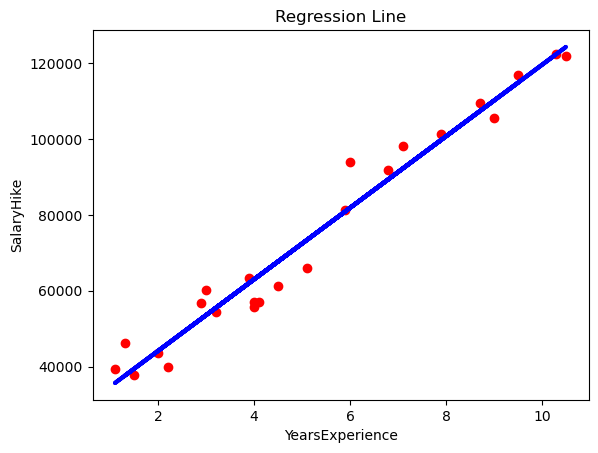

In [20]:
# Visualize the regression line
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, y_pred_train, color='blue', linewidth=3)
plt.title('Regression Line')
plt.xlabel('YearsExperience')
plt.ylabel('SalaryHike')
plt.show()